# Linear Regression

In this project, I build a linear regression model from scratch without using pre-built training functions.  
I generate synthetic data with two features and predict a target variable using simple linear regression concepts.

## What is Linear Regression?

Linear regression is one of the most basic and powerful tools in machine learning.  
It tries to find the best straight line (or hyperplane) that explains the relationship between input features (`X`) and the output (`y`).  
The goal is to minimize the difference between the predicted values and the true values.

## Learning Process 

The model learns by finding the best-fitting coefficients (slopes) and an intercept (bias) that minimize the error.  
I use the **Ordinary Least Squares (OLS)** method to calculate the parameters.  
OLS works by minimizing the sum of squared differences between the actual and predicted values.

## Strengths 

- Easy to understand and interpret.
- Fast to train, even on large datasets.
- Works well when there is a clear linear relationship between inputs and outputs.
- Provides insights into feature importance through coefficients.

## Limitations 

- Struggles when the true relationship is non-linear.
- Sensitive to outliers, which can distort the results.
- Assumes that errors are normally distributed and have constant variance (homoscedasticity).
- Multicollinearity (high correlation between features) can affect the stability of coefficients.

This project helps me better understand how a linear regression model actually works under the hood, beyond simply calling a library function.


# 📚 Step 1: Import Libraries


In [197]:
# Core Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Advanced Functionality
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# 📚 Step 2: Data Generation and Initial Visualization

## Synthetic Dataset with Multiple Features
We'll create data with 2 features:  
`y = 3 + 2*X1 + 1.5*X2 + noise`

# Data Generation and Feature Visualization

I generate synthetic data with two features (`X1` and `X2`) and a target variable `y`.  
The relationship between `X1` and `y` is mostly linear, while `X2` and `y` show a weaker relationship.

The plots below show how each feature individually relates to the target variable.


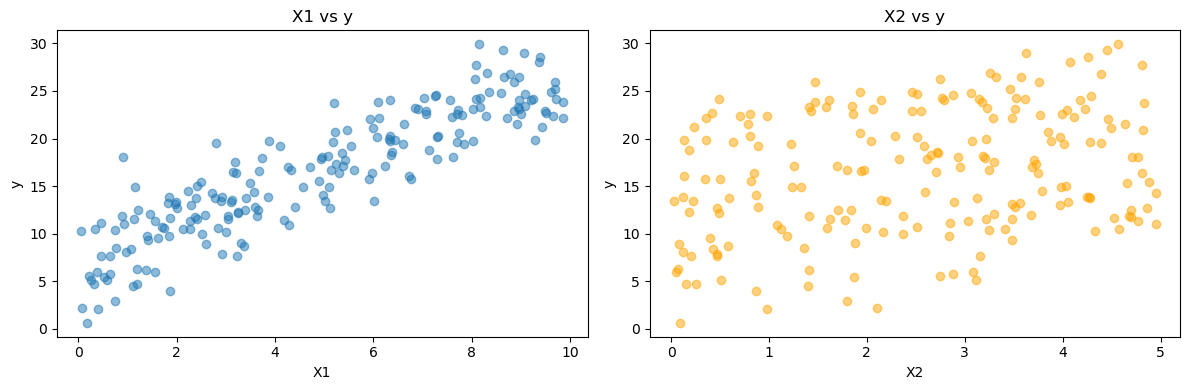

In [202]:
# Set random seed for reproducibility
np.random.seed(42)
n_samples = 200

# Features
X1 = np.random.rand(n_samples, 1) * 10
X2 = np.random.rand(n_samples, 1) * 5
X = np.hstack((X1, X2))  # Combine features

# Target
y = 3 + 2*X1 + 1.5*X2 + np.random.randn(n_samples, 1) * 2

# Plot features vs target
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.scatter(X1, y, alpha=0.5)
ax1.set_title("X1 vs y")
ax1.set_xlabel('X1')
ax1.set_ylabel('y')
ax2.scatter(X2, y, alpha=0.5, color='orange')
ax2.set_title("X2 vs y")
ax2.set_xlabel('X2')
ax2.set_ylabel('y')
plt.tight_layout()
plt.show()


# 📚 Step 3: Advanced Linear Regression Class

# Linear Regression Model Implementation

I create a custom `AdvancedLinearRegression` class that supports multiple features.  
The model is trained using the Ordinary Least Squares (OLS) method, calculates standard errors, and evaluates coefficients' significance.


In [164]:
# Advanced Linear Regression Class
class AdvancedLinearRegression:
    def __init__(self):
        self.coef_ = None  # Coefficients (slopes)
        self.intercept_ = None  # Bias term
        self.residuals_ = None  # Residuals for diagnostics
    
    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        try:
            theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
            self.intercept_ = theta[0]
            self.coef_ = theta[1:]
            self.residuals_ = y - self.predict(X)
        except np.linalg.LinAlgError:
            raise ValueError("Matrix is singular. Check for multicollinearity.")
    
    def predict(self, X):
        return self.intercept_ + X @ self.coef_
    
    def r_squared(self, y_true, y_pred):
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - (ss_res / ss_tot)
    
    def summary(self, X, y):
        y_pred = self.predict(X)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        n, p = X_b.shape
        mse = np.sum(self.residuals_ ** 2) / (n - p)
        cov_matrix = mse * np.linalg.inv(X_b.T @ X_b)
        se_coef = np.sqrt(np.diag(cov_matrix))
        
        t_stats = (np.concatenate([self.intercept_, self.coef_.flatten()]) / se_coef)
        p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), df=n-p))
        
        print(f"Intercept: {self.intercept_[0]:.4f} (SE: {se_coef[0]:.4f}, t: {t_stats[0]:.4f}, p: {p_values[0]:.4f})")
        for i in range(len(self.coef_)):
            print(f"X{i+1} coef: {self.coef_[i][0]:.4f} (SE: {se_coef[i+1]:.4f}, t: {t_stats[i+1]:.4f}, p: {p_values[i+1]:.4f})")
        print(f"R²: {self.r_squared(y, y_pred):.4f}")


# 📚 Step 4: Model Training and Summary Output

# Model Training on Original Data

I train the model on the unscaled feature set to check the initial performance.
I also compare the results with a standard sklearn LinearRegression model to validate my implementation.


In [166]:
# Model execution
model = AdvancedLinearRegression()
model.fit(X, y)
model.summary(X, y)

Intercept: 3.1640 (SE: 0.3667, t: 8.6275, p: 0.0000)
X1 coef: 2.0020 (SE: 0.0477, t: 41.9879, p: 0.0000)
X2 coef: 1.4279 (SE: 0.0960, t: 14.8777, p: 0.0000)
R²: 0.9083


# 📚 Step 5: Comparison with Scikit-Learn

In [211]:
sklearn_model = LinearRegression().fit(X, y)
print("sklearn Intercept:", sklearn_model.intercept_[0])
print("sklearn Coefficients:", sklearn_model.coef_[0])
print("sklearn R²:", sklearn_model.score(X, y))

sklearn Intercept: 3.164030488785709
sklearn Coefficients: [2.00196402 1.42787553]
sklearn R²: 0.9083357553827632


# 📚 Step 6: Feature Scaling and Training on Scaled Data

# Feature Scaling and Retraining

Since the features have different scales, I apply standardization using `StandardScaler`.  
This improves model stability and interpretability.

I retrain the model using the scaled data and print the updated model summary.


In [215]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train on scaled data
model_scaled = AdvancedLinearRegression()
model_scaled.fit(X_scaled, y)
model_scaled.summary(X_scaled, y)

Intercept: 16.4546 (SE: 0.1402, t: 117.3649, p: 0.0000)
X1 coef: 5.8888 (SE: 0.1403, t: 41.9879, p: 0.0000)
X2 coef: 2.0866 (SE: 0.1403, t: 14.8777, p: 0.0000)
R²: 0.9083


# 📚 Step 7: Cross-Validation (5-Fold)

# Cross-Validation

To test how well the model generalizes, I apply 5-fold cross-validation.  
I calculate and report the average R² score across all folds.


In [219]:
# Cross-validation with KFold
kf = KFold(n_splits=5)
r2_scores = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    model_cv = AdvancedLinearRegression()
    model_cv.fit(X_train, y_train)
    y_pred = model_cv.predict(X_test)
    
    # Fixed the indexing issue with r_squared
    r2_scores.append(model_cv.r_squared(y_test, y_pred))

print(f"Mean R² across 5 folds: {np.mean(r2_scores):.4f}")

Mean R² across 5 folds: 0.9034


# 📚 Step 8: Residual Analysis

# Residual Analysis: Residuals vs Predicted

The plot below shows the residuals (errors) against the predicted values.  
The residuals are randomly scattered around zero, which suggests that the model does not have serious issues like heteroscedasticity (changing error variance).


# Residuals Distribution

I plot the distribution of residuals to check if the residuals are roughly normally distributed.  
The distribution looks reasonably symmetric around zero, which supports the assumption of normality for linear regression residuals.


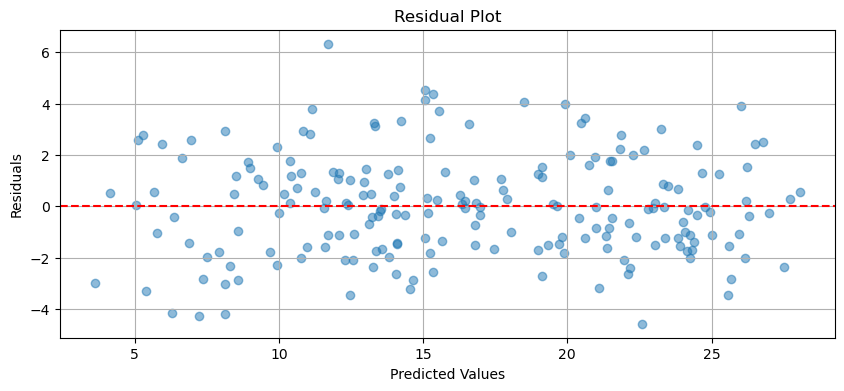

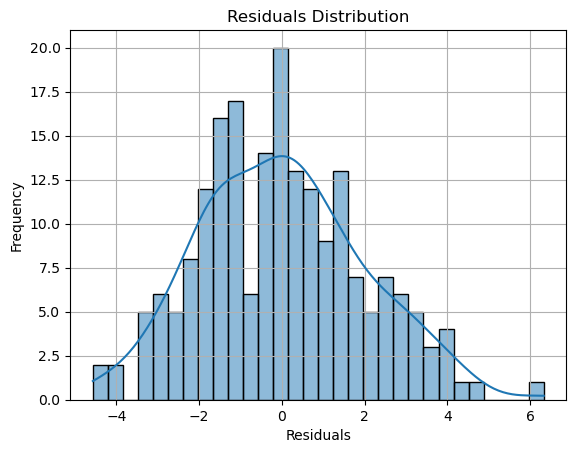

In [179]:
# Plot residuals
plt.figure(figsize=(10, 4))
plt.scatter(model.predict(X), model.residuals_, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

# Additional: Residual distribution
import seaborn as sns

sns.histplot(model.residuals_.flatten(), kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# Conclusion

The model captures the relationship between features and the target quite well.  
The residual analysis and cross-validation results show that the model is stable and fits the data properly.  
Building the model from scratch helped me better understand the inner workings of linear regression, especially how the coefficients are calculated and evaluated.
